In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('diabetes.csv')

invalid_input = True

# Loop until valid input is provided
while invalid_input:
    # User input
    comparison_input = input(
        "Please choose a pair to compare:\n"
        "a. Glucose and Blood Pressure\n"
        "b. Glucose and Insulin\n"
        "c. Glucose and Age\n"
        "d. Insulin and BMI\n"
        "e. Insulin and Age\n"
        "f. BMI and Diabetes Pedigree Function\n"
    )
    match comparison_input:
        case 'A'| 'a':
            invalid_input = False
            pair = [1, 2]
        case 'B'| 'b':
            invalid_input = False
            pair = [1, 4]
        case 'C'| 'c':
            invalid_input = False
            pair = [1, 7]
        case 'D'| 'd':
            invalid_input = False   
            pair = [4, 5]
        case 'E'| 'e':
            invalid_input = False   
            pair = [4, 7]
        case 'F'| 'f':
            invalid_input = False   
            pair = [5, 6]        
        case _:
            print("Invalid Input")

# Extract features (X) and target variable (y) from the dataset
X = dataset.iloc[:, pair].values
y = dataset.iloc[:, -1].values

headers = dataset.iloc[:, pair].columns.tolist()

# Calculate the minimum and maximum values for each feature
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)

# Print the minimum and maximum values for each feature
print(f"Minimum value: {min_values}")
print(f"Maximum value: {max_values}")

Minimum value: [0.    0.078]
Maximum value: [67.1   2.42]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.25
                                                    , random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
y_pred = knn.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1)
                      , y_test.reshape(len(y_test),1))
                      ,1))

[[1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [7]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

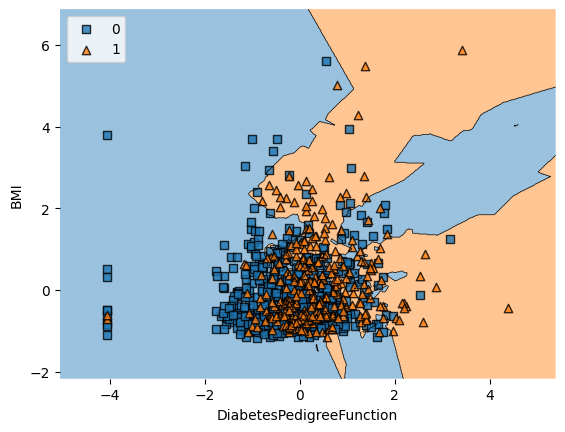

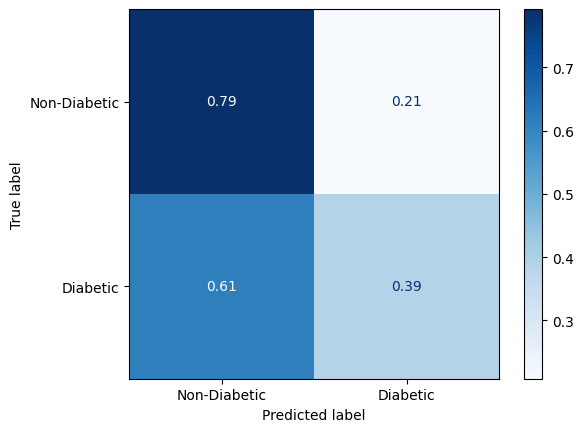

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay

# Create a mapping for class labels (1 and 0) to more readable names (Diabetic and Non-Diabetic)
class_mapping = {0: 'Non-Diabetic', 1: 'Diabetic'}

# Get unique class names
sorted_class_names = sorted(dataset['Outcome'].unique())

# Map the sorted values
class_names = list(map(class_mapping.get, sorted_class_names))

# Plot the decision regions using mlxtend
plot_decision_regions(X_combined, y_combined, clf=knn)
plt.xlabel(headers[1])
plt.ylabel(headers[0])
plt.legend(loc='upper left')

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize='true',
)
plt.show()

In [9]:
# Initialize an empty list to store user inputs
user_inputs = []

# Iterate over class names, minimum values, and maximum values simultaneously
for class_name, min_val, max_val in zip(headers, min_values, max_values):
    while True:
        # Prompt the user for input within the specified range
        try:
            user_input = float(input(f"Enter {class_name} ({min_val} - {max_val}): "))
            # Check if the user input is within the specified range
            if min_val <= user_input <= max_val:
                print(f"{class_name} input is valid.")
                user_inputs.append(user_input) # Add the valid input to the list
                break
            else:
                print("Invalid input. Please enter a value within the specified range.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Convert the list of user inputs to a numpy array  
user_inputs = np.array([user_inputs])

BMI input is valid.
DiabetesPedigreeFunction input is valid.


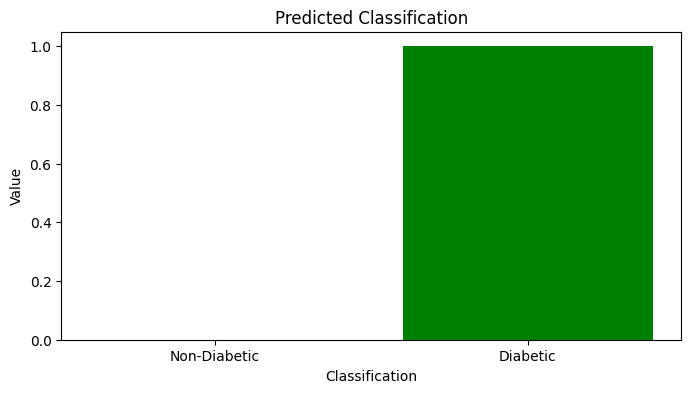

The predicted classification is: Diabetic
Accuracy of the model:66.15%
Precision of the model: 47.06%
Recall of the model: 38.71%
F1 Score of the model: 42.48%
Probability of being Non-Diabetic: 20.00%
Probability of being Diabetic: 80.00%


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Preprocess user input
user_inputs = sc.transform(user_inputs)

# Predict the result and the probabilities
predicted_result = knn.predict(user_inputs)
predicted_classification_probabilities = knn.predict_proba(user_inputs)

# Create a vector representation of the predicted class
predicted_vector = np.zeros(len(class_names))
predicted_vector[np.where(sorted_class_names == predicted_result[0])] = 1

# Create a bar chart to visualize the prediction
plt.figure(figsize=(8, 4))
plt.bar(class_names, predicted_vector, color=['green' if val else 'red' for val in predicted_vector])
plt.xlabel('Classification')
plt.ylabel('Value')
plt.title('Predicted Classification')
plt.show()

# Print the predicted classification
print(f"The predicted classification is: {class_mapping.get(predicted_result[0])}")

# Calculate and print the accuracy of the model
print(f"Accuracy of the model:{(accuracy_score(y_test, knn.predict(X_test)) * 100):.2f}%")

# Calculate and print the precision of the model
print(f"Precision of the model: {(precision_score(y_test, knn.predict(X_test)) * 100):.2f}%")

# Calculate and print the recall of the model
print(f"Recall of the model: {(recall_score(y_test, knn.predict(X_test)) * 100):.2f}%")

# Calculate and print the F1 Score of the model
print(f"F1 Score of the model: {(f1_score(y_test, knn.predict(X_test)) * 100):.2f}%")

# Print the probabilities for each class
for class_name, probability in zip(class_names, predicted_classification_probabilities[0]):
    print(f"Probability of being {class_name}: {(probability * 100):.2f}%")

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Diabetes Dataset:
        
a. Glucose and Blood Pressure
   
    - 75.00%
    
b. Glucose and Insulin
   
    - 72.92%

c. Glucose and Age
  
    - 73.96%

d. Insulin and BMI
   
    - 70.83%
    
e. Insulin and Age
   
    - 67.71%
    
f. BMI and Diabetes Pedigree Function
   
    - 66.15%

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Accuracy of the model using Data Table 1:
        
a. Glucose and Blood Pressure
   
    - 100.00%
    
b. Glucose and Insulin
   
    - 75.00%

c. Glucose and Age
  
    - 100.00%

d. Insulin and BMI
   
    - 75.00%
    
e. Insulin and Age
   
    - 100.00%
    
f. BMI and Diabetes Pedigree Function
   
    - 100.00%

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

a. What is the main difference between diabetes type 1 and type 2?

The main difference between Type 1 and Type 2 diabetes is its cause. Type 1 diabetes is an autoimmune disorder where the immune system attacks and damages the Islet cells, clusters of cells in the pancreas that are responsible for regulating blood sugar levels in the body. Because of this, the body lacks insulin. On the other hand, Type 2 diabetes is mainly caused by poor lifestyle choices related to a person’s diet, exercise habits, and overall health. These choices lead to a person’s body being unable to process the insulin and the pancreas producing lesser amounts of insulin overtime. It is important to note that genetics and family history also play a role in the development of both types of diabetes.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

b. What is lifestyle diabetes and how do we prevent it?

Type 2 diabetes is often referred to as a lifestyle disease or lifestyle diabetes, which arises from a combination of sedentary habits and poor dietary choices leading to obesity. To manage and prevent type 2 diabetes, it is crucial to make positive lifestyle adjustments. This primarily involves adopting a balanced diet, engaging in regular physical activity, and managing body weight to counteract the effects of a sedentary lifestyle.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

c. Which part of the body is affected by diabetes? Explain.

The pancreas is the part of the body that is affected by diabetes. This is because the pancreas plays a crucial role in diabetes, as it contains the endocrine glands that release hormones such as glucagon and insulin that are responsible for regulating blood sugar levels. This vital function is significantly affected by both type 1 and type 2 diabetes. In type 1 diabetes, the body fails to produce enough insulin because it attacks the Islet cells that are responsible for producing insulin and glucagon, while in type 2 diabetes, the body fails to fully utilize insulin and the pancreas produces less insulin overtime. This disruption in insulin production has far-reaching impacts on major organs and organ systems, such as the heart and blood vessels, kidneys, lungs, digestive system, and brain.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

d. In your opinion, how will data mining be able to contribute to the research and development of cures and procedures in treating diabetes?

From the definition of data mining, it is the methodical process of analyzing large datasets in order to identify significant patterns and relationships. The extensive collection of data on diabetes provides us an opportunity to uncover insights from these patterns and relationships. This knowledge/data, depending on its quality, can serve as a foundation for a deeper understanding, enabling us to develop effective prevention strategies and advance research and development efforts, with the ultimate goal of finding cures and treatments for both type 1 and type 2 diabetes. By leveraging the power of data, we can help in paving the way towards transformative advancements in diabetes care and management.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

References:

Type 1 vs Type 2 Diabetes | UVA Health. (n.d.). https://uvahealth.com/services/diabetes-care/types 

Type 2 Diabetes: What Is It? (for Teens) - KidsHealth. (2018). Kidshealth.org. https://kidshealth.org/en/teens/type2.html

Definition: Islet Cells (for Parents) - Nemours KidsHealth. (n.d.). Kidshealth.org. https://kidshealth.org/en/parents/islet-cells.html

Type 2 diabetes - Symptoms and causes - Mayo Clinic. (2023, March 14). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193

Osborn, C. O. (2022, July 1). Type 1 and type 2 diabetes: what’s the difference? Healthline. https://www.healthline.com/health/difference-between-type-1-and-type-2-diabetes#How-does-diabetes-affect-the-body?

ReachGiant.com. (2023, June 13). Differences between Type 1 and type 2 diabetes - DRC. Diabetes Research Connection. https://diabetesresearchconnection.org/differences-type-1-type-2-diabetes/?gclid=Cj0KCQjw7uSkBhDGARIsAMCZNJvLaZLgGvQ8wnteKjjqY5Iefwk83_q5kLBthgGfSLn6zXNcX2z_0UgaAl0qEALw_wcB